In [ ]:
import numpy as np

#study hours-x and marks-y
X=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print("Good Fit (Linear Regression)")
print("Train MSE : ",mean_squared_error(y_train,y_train_pred))
print("Train  R2 score : ",r2_score(y_train,y_train_pred))

Good Fit (Linear Regression)
Train MSE :  1.875
Train  R2 score :  0.9657142857142857


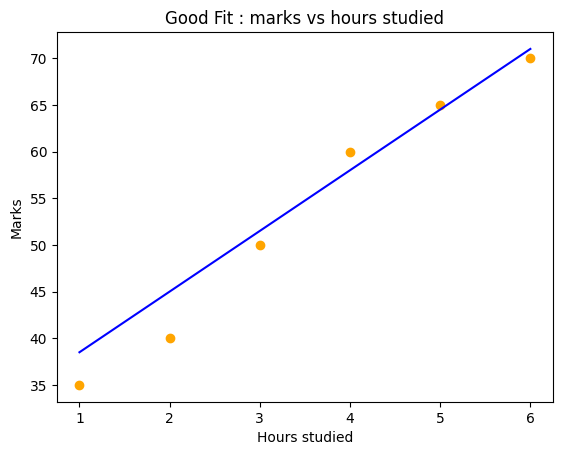

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color="orange")
plt.plot(X,model.predict(X),color="blue")
plt.title("Good Fit : marks vs hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Marks")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=5)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

overfit_model=LinearRegression()
overfit_model.fit(X_train_poly,y_train)

y_train_pred_poly=overfit_model.predict(X_train_poly)
y_test_pred_poly=overfit_model.predict(X_test_poly)

In [ ]:
print("Overfit (Polynomial degree=5)")
print("MSE : ",mean_squared_error(y_train,y_train_pred_poly))
print("R2 score : ",r2_score(y_train,y_train_pred_poly))

Overfit (Polynomial degree=5)
MSE :  8.363894592162157e-24
R2 score :  1.0


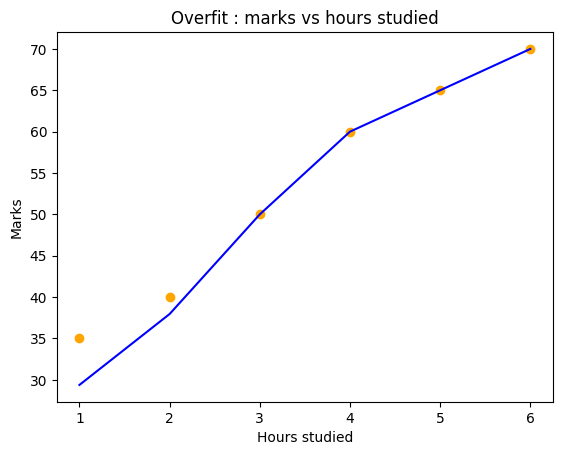

In [ ]:
plt.scatter(X,y,color="orange")
plt.plot(X,overfit_model.predict(poly.fit_transform(X)),color="blue")
plt.title("Overfit : marks vs hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Marks")
plt.show()

In [ ]:
poly1=PolynomialFeatures(degree=5)
X_poly=poly1.fit_transform(X)

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=1)
ridge.fit(X_poly,y)
y_ridge_pred=ridge.predict(X_poly)

In [ ]:
print("Ridge Regression")
print("MSE : ",mean_squared_error(y,y_ridge_pred))
print("R2 score : ",r2_score(y,y_ridge_pred))

Ridge Regression
MSE :  0.24058058055628095
R2 score :  0.9985320506949108


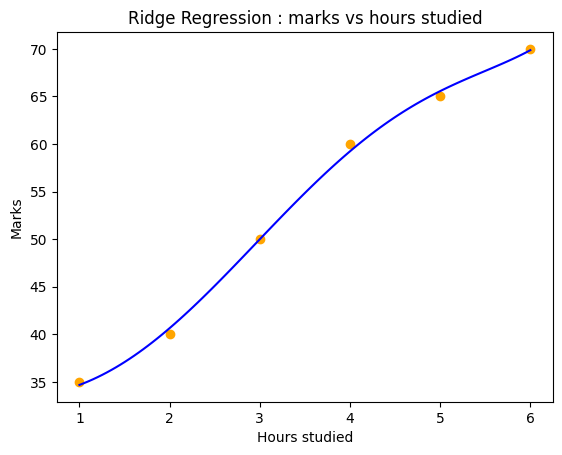

In [ ]:
X_grid=np.linspace(1,6,100).reshape(-1,1)
X_grid_poly=poly1.fit_transform(X_grid)

plt.scatter(X,y,color="orange")
plt.plot(X_grid,ridge.predict(X_grid_poly),color="blue")
plt.title("Ridge Regression : marks vs hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Marks")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(X_poly,y)

y_lasso_pred=lasso.predict(X_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("Lasso Regression")
print("MSE : ",mean_squared_error(y,y_lasso_pred))
print("R2 score : ",r2_score(y,y_lasso_pred))

Lasso Regression
MSE :  0.7727384155729786
R2 score :  0.9952849859388767


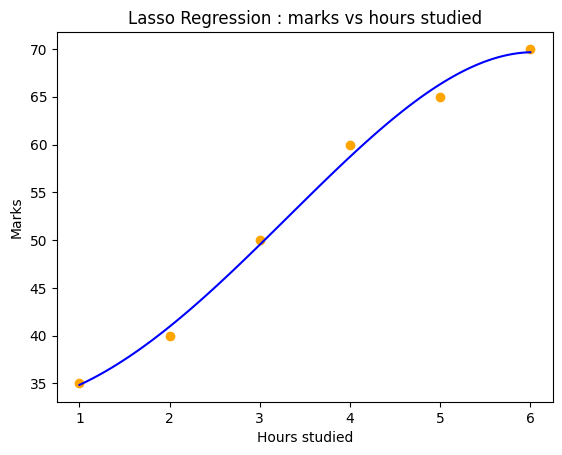

In [ ]:
plt.scatter(X,y,color="orange")
plt.plot(X_grid,lasso.predict(X_grid_poly),color="blue")
plt.title("Lasso Regression : marks vs hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Marks")
plt.show()